# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [19]:
cities

['lebu',
 'bredasdorp',
 'jamestown',
 'balaipungut',
 'mgachi',
 'ziniare',
 'cabo san lucas',
 'ponta do sol',
 'rikitea',
 'sampit',
 'bethel',
 'esperance',
 'kapaa',
 'mafinga',
 'illoqqortoormiut',
 'fukue',
 'barentsburg',
 'mataura',
 'pinyug',
 'vanimo',
 'hamilton',
 'narsaq',
 'cape town',
 'barberino di mugello',
 'thompson',
 'komsomolskiy',
 'tsihombe',
 'barrow',
 'krasnoselkup',
 'yellowknife',
 'carnarvon',
 'bluff',
 'saint-philippe',
 'vao',
 'clyde river',
 'vaitupu',
 'taolanaro',
 'aykhal',
 'punta arenas',
 'jackson',
 'takanosu',
 'andrychow',
 'busselton',
 'qorveh',
 'mayo',
 'bengkulu',
 'eldorado',
 'gumushane',
 'lavrentiya',
 'kahului',
 'ngukurr',
 'nishihara',
 'sentyabrskiy',
 'shaoyang',
 'ushuaia',
 'maarianhamina',
 'nieuw amsterdam',
 'upernavik',
 'katsuura',
 'juegang',
 'san cristobal',
 'butaritari',
 'carutapera',
 'faanui',
 'meulaboh',
 'vaini',
 'rabak',
 'tvoroyri',
 'fairbanks',
 'mawlaik',
 'abha',
 'dikson',
 'cherskiy',
 'victoria',
 's

In [20]:
cities_df=pd.read_csv("../output_data/cities.csv")

cities_df["Temperature"]=""
cities_df["Feels Like"]=""



cities_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature,Feels Like
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228,,
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230,,
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934,,
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230,,
...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564,,
573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564,,
574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565,,
575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566,,


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
import datetime

if cities[0]!="london":
    cities.insert(0,"london")



# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    params={"q":city,
           "appid":weather_api_key,
           "units":"imperial"}
    
    
    # Create endpoint URL with each city
    #response = requests.get(f"{base_url}?q={city}&appid={weather_api_key}&units=imperial")
    response = requests.get(base_url, params=params)
    if response.status_code==200:
        data=response.json()
        
    else:
        print(response)
        data=None
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
 
    
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
    if data:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(data["dt"])


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    else:
        print("City not found. Skipping...")
        
    if record_count >10:
        break
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(city_data)
    
    
             

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
[{'City': 'london', 'Lat': 51.5085, 'Lng': -0.1257, 'Max Temp': 50.68, 'Humidity': 93, 'Cloudiness': 43, 'Wind Speed': 5.75, 'Country': 'GB', 'Date': datetime.datetime(2023, 3, 17, 19, 31, 40)}, {'City': 'lebu', 'Lat': -37.6167, 'Lng': -73.65, 'Max Temp': 57.36, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 5.03, 'Country': 'CL', 'Date': datetime.datetime(2023, 3, 17, 19, 45, 13)}, {'City': 'bredasdorp', 'Lat': -34.5322, 'Lng': 20.0403, 'Max Temp': 63.93, 'Humidity': 79, 'Cloudiness': 8, 'Wind Speed': 4.74, 'Country': 'ZA', 'Date': datetime.datetime(2023, 3, 17, 19, 45, 14)}, {'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 35.19, 'Humidity': 86, 'Cloudiness': 100, 'Wind Speed': 14.97, 'Country': 'US', 'Date': datetime.datetime(2023, 3, 17, 19, 45, 14)}, {'City': 'balaipungut', 'Lat': 1.05, 'Lng': 101.2833, 'Max Temp':

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,london,51.5085,-0.1257,50.68,93,43,5.75,GB,2023-03-17 19:31:40
1,lebu,-37.6167,-73.6500,57.36,93,100,5.03,CL,2023-03-17 19:45:13
2,bredasdorp,-34.5322,20.0403,63.93,79,8,4.74,ZA,2023-03-17 19:45:14
3,jamestown,42.0970,-79.2353,35.19,86,100,14.97,US,2023-03-17 19:45:14
4,balaipungut,1.0500,101.2833,83.68,72,97,3.87,ID,2023-03-17 19:45:15


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,london,51.5085,-0.1257,50.68,93,43,5.75,GB,2023-03-17 19:31:40
1,lebu,-37.6167,-73.6500,57.36,93,100,5.03,CL,2023-03-17 19:45:13
2,bredasdorp,-34.5322,20.0403,63.93,79,8,4.74,ZA,2023-03-17 19:45:14
3,jamestown,42.0970,-79.2353,35.19,86,100,14.97,US,2023-03-17 19:45:14
4,balaipungut,1.0500,101.2833,83.68,72,97,3.87,ID,2023-03-17 19:45:15


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

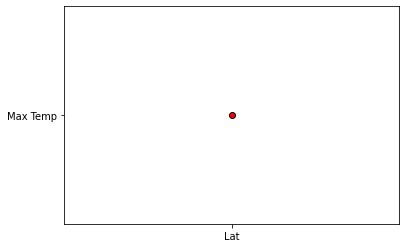

In [39]:
# Build scatter plot for latitude vs. temperature
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(-100, x_limit, 10)

city_data_df=plt.scatter("Lat", "Max Temp", marker="o", facecolors="red",
                         edgecolors="black")
#city_data_df.plot(x=Lat, y=Max Temp,
#                 kind="scatter", title=Temp on the Latitude,
 #                legend=True, xlabel=Latitude,
  #               ylabel=Longitude, c=blue, size=1)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [27]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

<Figure size 432x288 with 0 Axes>

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE